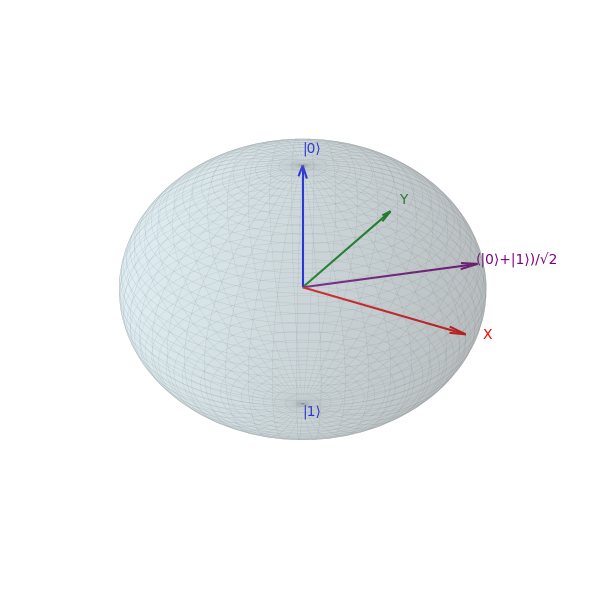

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create Bloch sphere
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

# Sphere surface
u, v = np.mgrid[0:2*np.pi:100j, 0:np.pi:100j]
x = np.cos(u) * np.sin(v)
y = np.sin(u) * np.sin(v)
z = np.cos(v)
ax.plot_surface(x, y, z, color='lightblue', alpha=0.2, edgecolor='gray', linewidth=0.2)

# Axes
ax.quiver(0, 0, 0, 1, 0, 0, color='r', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, 0, 1, 0, color='g', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, 0, 0, 1, color='b', arrow_length_ratio=0.1)

# Label axes
ax.text(1.1, 0, 0, 'X', color='r')
ax.text(0, 1.1, 0, 'Y', color='g')
ax.text(0, 0, 1.1, '|0⟩', color='b')
ax.text(0, 0, -1.1, '|1⟩', color='b')

# Example qubit state vector
ax.quiver(0, 0, 0, 1/np.sqrt(2), 1/np.sqrt(2), 0, color='purple', arrow_length_ratio=0.1)
ax.text(0.7, 0.7, 0, '(|0⟩+|1⟩)/√2', color='purple')

# Turn off grid and axes
ax.axis('off')
plt.tight_layout()
plt.show()

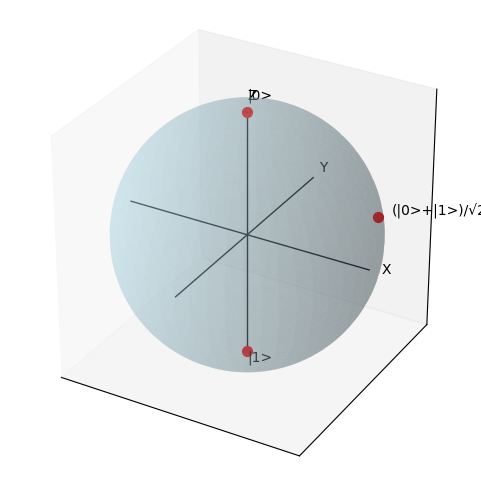

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create Bloch sphere surface
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, color='lightblue', alpha=0.3, linewidth=0)

# Draw coordinate axes (X, Y, Z)
ax.plot([-1, 1], [0, 0], [0, 0], 'k-', lw=1)  # X-axis
ax.plot([0, 0], [-1, 1], [0, 0], 'k-', lw=1)  # Y-axis
ax.plot([0, 0], [0, 0], [-1, 1], 'k-', lw=1)  # Z-axis

# Mark key state vectors
points = {
    '|0>': (0, 0, 1),
    '|1>': (0, 0, -1),
    '(|0>+|1>)/√2': (np.sqrt(2)/2, np.sqrt(2)/2, 0)
}
for label, (xp, yp, zp) in points.items():
    ax.scatter([xp], [yp], [zp], color='red', s=50)
    ax.text(xp * 1.1, yp * 1.1, zp * 1.1, label, color='black')

# Label axes endpoints
ax.text(1.1, 0, 0, 'X', color='black')
ax.text(0, 1.1, 0, 'Y', color='black')
ax.text(0, 0, 1.1, 'Z', color='black')

# Tidy up view
ax.set_xlim([-1, 1]); ax.set_ylim([-1, 1]); ax.set_zlim([-1, 1])
ax.set_xticks([]); ax.set_yticks([]); ax.set_zticks([])
ax.set_box_aspect([1, 1, 1])  # Equal aspect ratio
plt.show()

Initial state vector |00>: [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
State vector after X gate: [ 0.70710678+0.j -0.70710678+0.j  0.        +0.j  0.        +0.j]


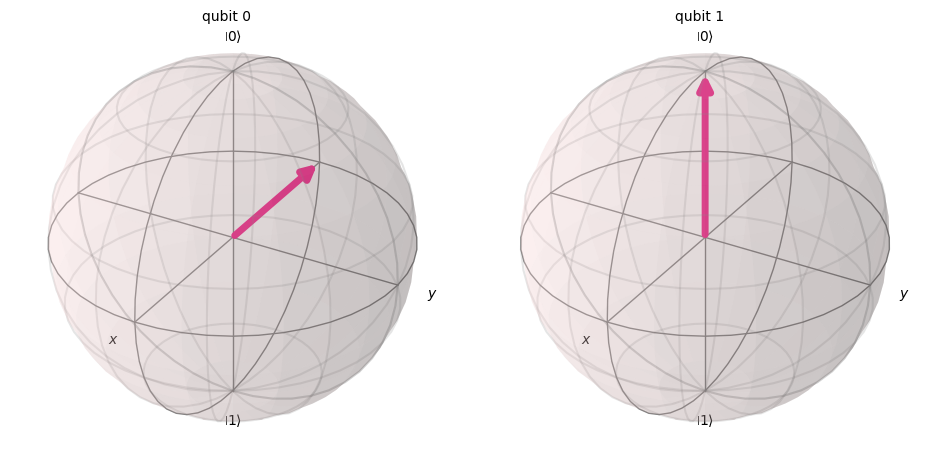

In [6]:
# Quantum Simulation: Two Qubits Pass Through X Gate in Parallel

# Step 1: Import required libraries
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector
from IPython.display import display

# Step 2: Initialize a 2-qubit quantum circuit
qc = QuantumCircuit(1)

qc.h(0)

# Step 3: Apply X gate (NOT gate) to both qubits
# qc.z(0)
qc.h(0)
# qc.s(0)
qc.x(0)
qc.h(0)

# Step 5: Get the initial state vector |00>
init_state = Statevector.from_label('00')
print("Initial state vector |00>:", init_state.data)

# Step 6: Apply the quantum circuit to the initial state vector
final_state = init_state.evolve(qc)
print("State vector after X gate:", final_state.data)

# Step 7: Visualize Bloch sphere and measurement results
display(plot_bloch_multivector(final_state))

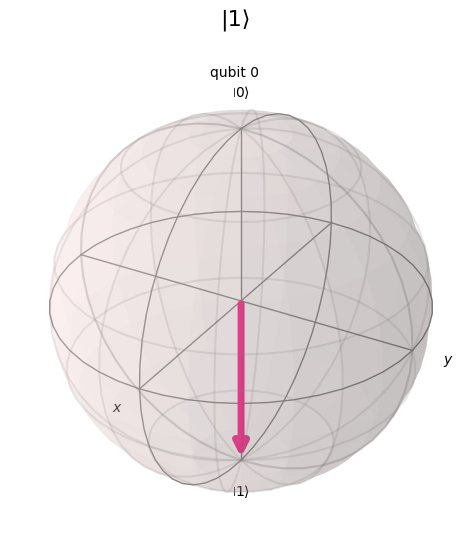

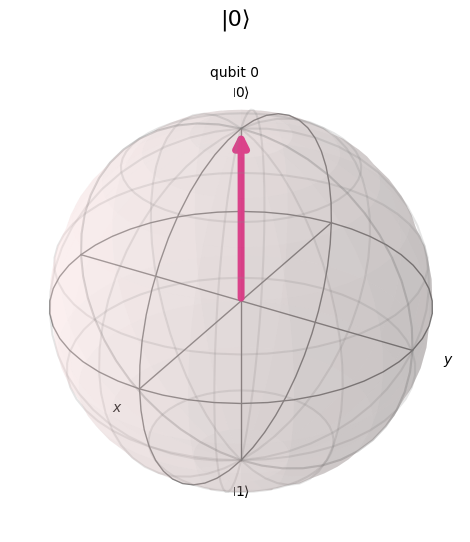

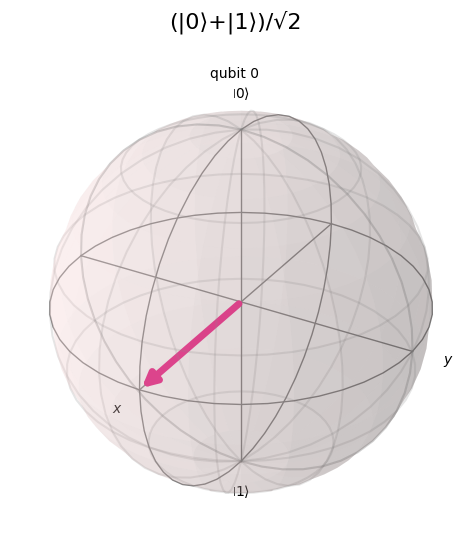

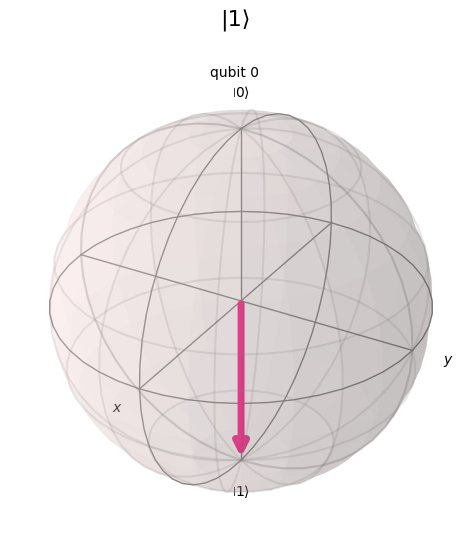

In [15]:
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import HGate, XGate
from qiskit.visualization import plot_bloch_multivector

ket0  = Statevector.from_label('0')
plus  = ket0.evolve(HGate())     # (|0⟩+|1⟩)/√2
ket1  = ket0.evolve(XGate())     # |1⟩

plot_bloch_multivector(ket0, title='|0⟩')                # 北极
plot_bloch_multivector(plus, title='(|0⟩+|1⟩)/√2')       # 赤道 +X
plot_bloch_multivector(ket1, title='|1⟩')                # 南极